# Chapter 14: Polynomial-time Reductions

Code related to [Chapter 14: Polynomial-time Reductions](https://introtcs.org/public/lec_12_NP.html) in __Introduction to Theoretical Computer Science__ by Boaz Barak. [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/boazbk/tcscode/blob/master/Chap_13_reductions.ipynb)

In [ ]:
!wget https://raw.githubusercontent.com/boazbk/tcscode/master/Utilities.ipynb
!pip install schemdraw
!pip install pydotplus
!apt install -y graphviz
!pip install graphviz

In [1]:
# utility code 
%run "Utilities.ipynb"
from IPython.display import clear_output
clear_output()

In [2]:
import networkx as nx

import pydotplus

def nxgraph(G):
    P = pydotplus.graph_from_dot_data(G.source)
    return nx.drawing.nx_pydot.from_pydot(P)

Dependencies for this notebook: `graphviz` executable installed on the system and on the path, [networkx](https://anaconda.org/anaconda/networkx), [graphviz python](https://anaconda.org/conda-forge/python-graphviz) and [pydotplus](https://anaconda.org/conda-forge/pydotplus) Anaconda packages. (See [here](https://graphviz.readthedocs.io/en/stable/index.html) for the documentation of the graphviz package.)


_Useful unicode symbols:_ φ   ∨   ∧   ¬   ≠    Ψ

In [3]:
reductions = Digraph()
reductions.edges([("3SAT","01 Equations"),("01 Equations","Quadratic Equations"),("01 Equations","Subset Sum"), ("3SAT","Independent Set"),("3SAT","Longest Path"),("Independent Set","Maximum Cut")])

### 3SAT

$(x_0 \vee \overline{x}_3 \vee x_2) \wedge$ 

$\overline{x}_0 \vee x_1 \vee \overline{x}_2 ) \wedge$

$(x_1 \vee x_2 \vee \overline{x}_3 )$

In [4]:
φ = "(x0 ∨ ¬x3 ∨ x2 ) ∧ (¬x0 ∨ x1 ∨ ¬x2 ) ∧ (x1 ∨ x2 ∨ ¬x3 )  "

In [5]:
# Evaluate 3CNF φ on assignment x 
# Both are represented as strings
def evalcnf(φ,x):

    def varval(v):
        return (1-int(x[int(v[2:])])  if v[0]=="¬" else int(x[int(v[1:])]))
    
    for (v0,v1,v2) in getclauses(φ):
        # print(c+str([varval(v0),varval(v1),varval(v2)]))
        if not varval(v0)+varval(v1)+varval(v2): return False
    
    return True

# Clause list of a 3CNF φ
def getclauses(φ):
    clauses =  φ.split("∧")
    res = []
    for c in clauses:
        (v0,_,v1,_,v2) = c.strip()[1:-1].split()
        res.append((v0.strip(),v1.strip(),v2.strip()))
    return res
    

# number of variables of a formula φ
def numvars(φ):
    for n in range(len(φ)-1,0,-1):
        if φ.find('x'+str(n))>= 0: return n+1
    raise Exception


In [6]:
numvars(φ)

4

In [7]:
evalcnf(φ,"0101")

False

In [8]:
print(φ)

(x0 ∨ ¬x3 ∨ x2 ) ∧ (¬x0 ∨ x1 ∨ ¬x2 ) ∧ (x1 ∨ x2 ∨ ¬x3 )  


## Some bigger instances (DIMACS format)

In [9]:
def from_dimacs(cnf):
    φ = ""
    m = 0
    n = 0
    def var(idx): return f"x{int(idx)-1}" if int(idx)>0 else f"¬x{-int(idx)-1}"
    
    for line in cnf.split("\n"):
        if not line.strip() or line[0]=="c" or line[0]=="%" or line[0]=="0": continue
        if line[0]=="p":
            _,t,n_,m_ = line.split()
            if t!="cnf": raise Exception("Only handle CNF!")
            n = int(n_)
            m = int(m_)
            continue
        a,b,c,_ = line.split()
        if _ != "0": raise Exception("Only handle 3CNF!")
        φ += f"({var(a)} ∨ {var(b)} ∨ {var(c)} ) ∧ "
    φ = φ[:-3]
    return φ
        
            

In [10]:
def from_dimacs_assign(assign):
    avals = {}
    n = 0
    for a in assign.split():
        if a == "v": continue
        a = int(a)
        if a>0:
            avals[a-1] = "1"
            n = max(n,a)
        if a<0:
            avals[-a-1] = "0"
            n = max(n,-a)
        if a == 0:
            break
    x = ""
    for i in range(n):
        x += avals[i]
    return x

In [11]:
# from https://www.cs.ubc.ca/~hoos/SATLIB/benchm.html
cnf = r'''
c This Formular is generated by mcnf
c
c    horn? no 
c    forced? no 
c    mixed sat? no 
c    clause length = 3 
c
p cnf 20  91 
 4 -18 19 0
3 18 -5 0
-5 -8 -15 0
-20 7 -16 0
10 -13 -7 0
-12 -9 17 0
17 19 5 0
-16 9 15 0
11 -5 -14 0
18 -10 13 0
-3 11 12 0
-6 -17 -8 0
-18 14 1 0
-19 -15 10 0
12 18 -19 0
-8 4 7 0
-8 -9 4 0
7 17 -15 0
12 -7 -14 0
-10 -11 8 0
2 -15 -11 0
9 6 1 0
-11 20 -17 0
9 -15 13 0
12 -7 -17 0
-18 -2 20 0
20 12 4 0
19 11 14 0
-16 18 -4 0
-1 -17 -19 0
-13 15 10 0
-12 -14 -13 0
12 -14 -7 0
-7 16 10 0
6 10 7 0
20 14 -16 0
-19 17 11 0
-7 1 -20 0
-5 12 15 0
-4 -9 -13 0
12 -11 -7 0
-5 19 -8 0
1 16 17 0
20 -14 -15 0
13 -4 10 0
14 7 10 0
-5 9 20 0
10 1 -19 0
-16 -15 -1 0
16 3 -11 0
-15 -10 4 0
4 -15 -3 0
-10 -16 11 0
-8 12 -5 0
14 -6 12 0
1 6 11 0
-13 -5 -1 0
-7 -2 12 0
1 -20 19 0
-2 -13 -8 0
15 18 4 0
-11 14 9 0
-6 -15 -2 0
5 -12 -15 0
-6 17 5 0
-13 5 -19 0
20 -1 14 0
9 -17 15 0
-5 19 -18 0
-12 8 -10 0
-18 14 -4 0
15 -9 13 0
9 -5 -1 0
10 -19 -14 0
20 9 4 0
-9 -2 19 0
-5 13 -17 0
2 -10 -18 0
-18 3 11 0
7 -9 17 0
-15 -6 -3 0
-2 3 -13 0
12 3 -2 0
-2 -3 17 0
20 -15 -16 0
-5 -17 -19 0
-20 -18 11 0
-9 1 -5 0
-19 9 17 0
12 -2 17 0
4 -16 -5 0
%
0
'''

cnfsat = "v 1 -2 -3 -4 -5 6 -7 -8 -9 -10 -11 -12 13 14 15 -16 17 -18 -19 20 0"

In [12]:
Ψ = from_dimacs(cnf);

In [13]:
numvars(Ψ)

20

In [14]:
assign = from_dimacs_assign(cnfsat)
assign

'10000100000011101001'

In [15]:
evalcnf(Ψ,assign)

True

In [16]:
evalcnf(Ψ,"10000100110011101001")

False

## Zero One Equations

In [17]:
def subscript(i):
    return "_{"+str(i)+"} "
    #subs = ["₀","₁","₂","₃","₄","₅","₆","₇","₈","₉"]
    #return "".join(subs[int(c)] for c in str(i))

def desub(s):
    return int(s.strip()[2:-1])
    #desubs = {"₀":0,"₁":1,"₂":2,"₃":3,"₄":4,"₅":5,"₆":6,"₇":7,"₈":8,"₉":9}
    #res = "".join(str(desubs[c]) for c in s)
    #return int(res)
import re

def getatoms(s):
    return [a for a in re.split(r'\s*=\s*[\-]?\d+\s*\n|\s+|\+|\-|x',s) if a]

def numvareq(E):
    atoms = getatoms(E)
    print(atoms)
    return max(desub(a) for a in atoms)+1
        

In [18]:
from IPython.display import display, Markdown, Latex
def pp(E):
    E = E.replace('=','&=').replace('\n','\\\\ \n')
    E = r'\begin{align}'+'\n'+E+r'\end{align}'+'\n'
    display(Latex(E))
    
class Equation(str):
    def __init__(self,s):
        self.E = s
    def _repr_latex_(self):
        E = self.E.replace('=','&=').replace('\n','\\\\ \n')
        E = r'\begin{align}'+'\n'+E+r'\end{align}'+'\n'
        return E

        

In [19]:
def SAT2ZOE(φ):
    # Reduce 3SAT to 0/1 equations
    n = numvars(φ)
    E = ""
    for i in range(n): # add vars for negations
        E+= f"x{subscript(i)} + x{subscript(n+i)} = 1\n"
    m = 2*n
    for literals in getclauses(φ): 
        # map each clause to equation
        def var(lit): # map literal to variable 
            return f"x{subscript(n+int(lit[2:]))}" if lit[0]== "¬" else f"x{subscript(lit[1:])}"
        E+= " + ".join([var(lit) for lit in literals]) 
        E+= f" + x{subscript(m)} + x{subscript(m+1)} = 3\n"
        m += 2
    return Equation(E)

In [20]:
SAT2ZOE("(x0 ∨ ¬x3 ∨ x2 ) ∧ (x0 ∨ x1 ∨ ¬x2 ) ∧ (x1 ∨ x2 ∨ ¬x3 )")

'x_{0}  + x_{4}  = 1\nx_{1}  + x_{5}  = 1\nx_{2}  + x_{6}  = 1\nx_{3}  + x_{7}  = 1\nx_{0}  + x_{7}  + x_{2}  + x_{8}  + x_{9}  = 3\nx_{0}  + x_{1}  + x_{6}  + x_{10}  + x_{11}  = 3\nx_{1}  + x_{2}  + x_{7}  + x_{12}  + x_{13}  = 3\n'

## Quadratic Equations

In [21]:
def ZO2QE(E):
    n = numvareq(E)
    for i in range(n):
        E += f"x{subscript(i)}^2- x{subscript(i)} = 0\n"
    return E

In [22]:
φ = "(x0 ∨ ¬x3 ∨ x2 ) ∧ (x0 ∨ x1 ∨ ¬x2 ) ∧ (x1 ∨ x2 ∨ ¬x3 )"
pp(ZO2QE(SAT2ZOE(φ)))

['_{0}', '_{4}', '_{1}', '_{5}', '_{2}', '_{6}', '_{3}', '_{7}', '_{0}', '_{7}', '_{2}', '_{8}', '_{9}', '_{0}', '_{1}', '_{6}', '_{10}', '_{11}', '_{1}', '_{2}', '_{7}', '_{12}', '_{13}']


<IPython.core.display.Latex object>

## Subset sum

In [23]:
def ZO2QE(E):
    n = numvareq(E)
    m = len(E.split('\n'))
    

## Clique problem

__Input:__ Graph $G=(V,E)$ and $k\in\mathbb{N}$

__Output:__ $1$ if there is $S \subseteq V$ with $|S| \geq k$ s.t. $\{i,j \} \in E$ for every $i \neq j \in S$.

__Question:__ Is $3SAT \leq_p CLIQUE$ __a__ Yes __b__ No ,  __c__ I don't know 

$CLIQUE(G,k)=ISET(\overline{G},k)$

## 3SAT to independent set

__Thm:__ $3SAT \leq_p IS$

To prove need to show poly-time $R$ s.t. $R(\varphi)=G$ s.t. 

* __completeness:__ If $\varphi$ satisfiable then there is i.set of $G$ of size $\geq k$

* __soundness:__ If there is an i.set of $G$ with size $\geq k$ then $\varphi$ satisfiable.

__Proof:__ $3m$ vertices: $(x_7$ $\vee$ $\neg x_{10}$ $\vee$ $x_{12})$ maps to _triangle_, additional edges between __inconsistent vertices__

assignment $\Leftrightarrow$ independent set

In [25]:
# Reduction SAT to Independent Set
def SAT2IS_(φ):
    n = numvars(φ) 
    G =Graph() #(engine='neato')
    
    def nname(c,v): return f"({c},{v})"
    
    c = 0
    # nodes[literal] = vertices corresponding to this literal
    nodes = {f"x{i}":[] for i in range(n)}
    nodes.update(  {f"¬x{i}":[] for i in range(n)})
  
    c=0
    for C in getclauses(φ):
        for u in C: 
            G.node(nname(c,u),f"{c},{subscript(u)}",fontsize="12")
            negu = u[1:] if u[0]=="¬" else "¬"+u
            # add conflicting edges
            for v in nodes[negu]: G.edge(nname(c,u),v,color="red") 
            nodes[u].append(nname(c,u))
        # add triangle edges
        G.edges([[nname(c,C[0]), nname(c,C[1])],[nname(c,C[1]), nname(c,C[2])],[nname(c,C[0]), nname(c,C[2])]])
        c += 1
    
    return G

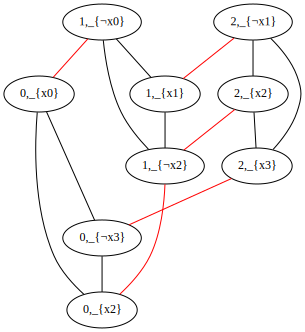

In [26]:
φ = "(x0 ∨ ¬x3 ∨ x2) ∧ (¬x0 ∨ x1 ∨ ¬x2) ∧ (¬x1 ∨ x2 ∨ x3)"
SAT2IS_(φ)

In [27]:
# same reduction but taking care of colors and keeping track what happens to an assignment
def SAT2IS(φ,x=""):
    S = []
#    G.node(u,style='filled',fillcolor=('red' if x and x[i]=="0" else 'green'))
        
    n = numvars(φ) 
    G =Graph() # (engine='neato')
    
    def nname(c,v): return f"({c},{v})"
    
    c = 0
    nodes = {}
    for i in range(n):
        nodes["x"+str(i)] = []
        nodes["¬x"+str(i)] = []
    
    for C in getclauses(φ):
        sat = False
        for u in C: 
            if x and (not sat) and (((u[0]=="¬") and (x[int(u[2:])]=="0")) or ((u[0]!="¬") and (x[int(u[1:])]=="1"))):
                G.node(nname(c,u),f"{c},{subscript(u)}",fontsize="10",style='filled',fillcolor='green')
                S.append(nname(c,u))
                sat = True
            else:
                G.node(nname(c,u),f"{c},{subscript(u)}",fontsize="10")
            negu = u[1:] if u[0]=="¬" else "¬"+u
            for v in nodes[negu]: G.edge(nname(c,u),v,color="red") 
            nodes[u].append(nname(c,u))
        G.edges([[nname(c,C[0]), nname(c,C[1])],[nname(c,C[1]), nname(c,C[2])],[nname(c,C[0]), nname(c,C[2])]])
        c += 1
    
    return (scale(G) if not x else (scale(G),S))

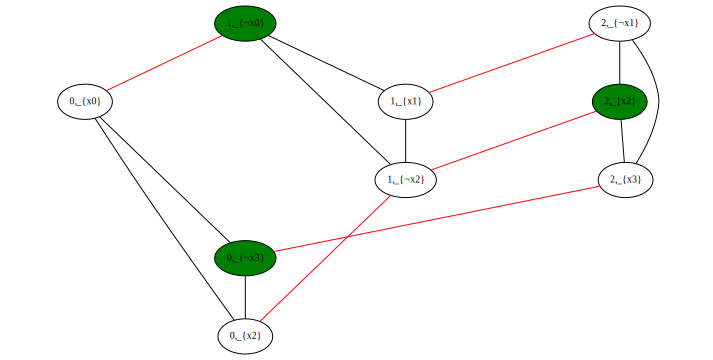

In [28]:
φ = "(x0 ∨ ¬x3 ∨ x2) ∧ (¬x0 ∨ x1 ∨ ¬x2) ∧ (¬x1 ∨ x2 ∨ x3)"
(G,S) = SAT2IS(φ,"0110")
G

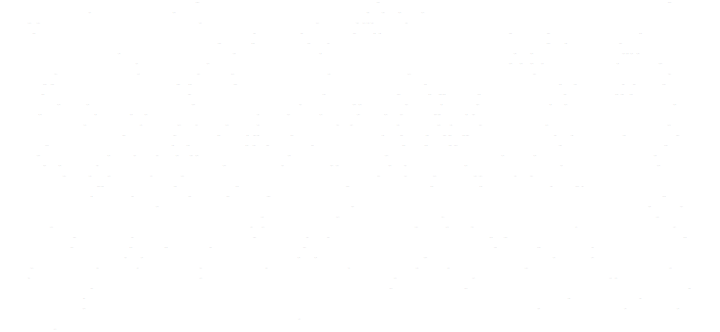

In [29]:
SAT2IS(Ψ)

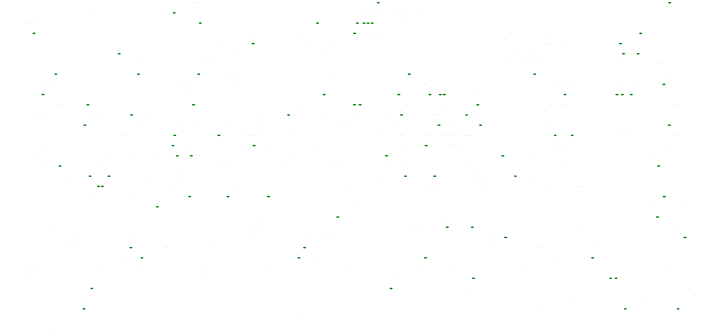

In [30]:
SAT2IS(Ψ,assign)[0]

__Completeness:__  $\exists$ sat assign. $\varphi$ $\Rightarrow$ $\exists$ $m$ iset in $G$ 

__Pf:__ One vertex out of triangle 

__Soundness:__ $\exists$ $m$ iset in $G$ $\Rightarrow$ $\exists$ sat assign. $\varphi$ 

__Pf:__ $m$ iset must have one vtx per triangle

If "$x_i=a$" in  $I$ then set $x_i=a$.

$x$ must satisfy all clauses.

## Proof by program

In [31]:
def recoverassignment(G,S,n):
    """Transform independent set S for G into a satisfying assignment for original formula"""
    x = [1]*n
    for i in range(n):
        for v in S: 
            if v.find(f"¬x{i}")>=0: x[i]=0
    return x

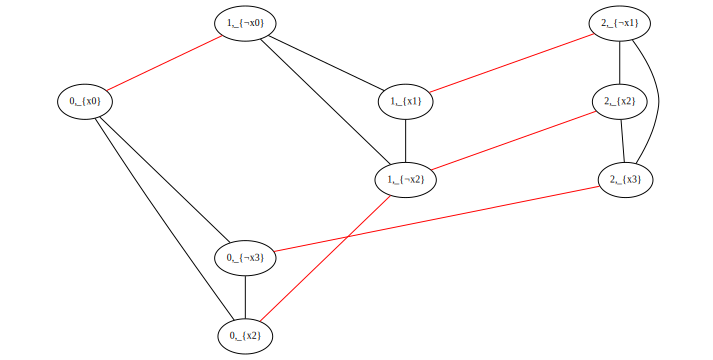

In [32]:
φ = "(x0 ∨ ¬x3 ∨ x2) ∧ (¬x0 ∨ x1 ∨ ¬x2) ∧ (¬x1 ∨ x2 ∨ x3)"
G = SAT2IS(φ)
G

In [33]:
recoverassignment(G,['(0,¬x3)', '(1,¬x0)', '(2,x2)'],4)

[0, 1, 1, 0]

## Independent set tp dominating set

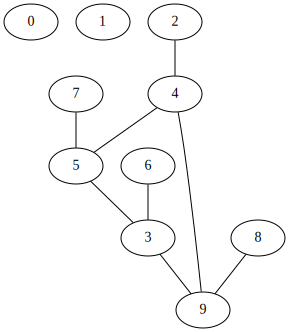

In [34]:
G =Graph()
for i in range(0,10):
    G.node(str(i))
    if i*i % 11 != i:
        G.edge(str(i), str((i*i % 11)))
G

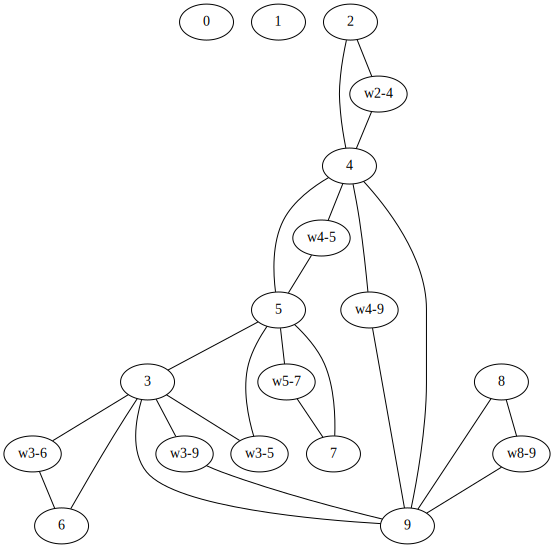

In [35]:
def VC2DS(G,k):
    """Reduce vertex cover to dominating set"""
    H = G.copy()
    G = nxgraph(G)
    for (u,v) in G.edges():
        w = f"w{u}-{v}"
        H.edge(u,w)
        H.edge(w,v)
    isolated = [u for u in G.nodes() if not list(G.neighbors(u)) ]
    return H,k + len(isolated)

VC2DS(G,10)[0]

## Independent Set to Maximum Cut

__Def:__ If $G=(V,E)$ and $S \subseteq V$ then $cut(S)$ is number of edges $\{u,v\}$ with $u\in S$ and $v\not\in S$.

$MAXCUT(G,k) = 1$ iff there is $S$ with $cut(S) \geq k$.

![](maxcut.png)

__Thm:__ $ISET \leq_p MAXCUT$

__Corollary:__ $3SAT \leq_p MAXCUT$

__Proof:__ $G=(V,E)$  maps to $H$ with: 

* Special _source_ vertex

* $n$ vertices corresponding to $V$

* $2m$ extra vertices $e_0,e_1$ for each edge

__Edges:__ $\{s^*,v \}$ for all $v\in V$, $5$ edge gadget for every $e\in E$.

__Claim:__ $G$ has $k$ iset $\Leftrightarrow$ $H$ has cut of $k+4m$ edges.

In [36]:
# Reduction IS to MAXCUT
def IS2MAXCUT(G):
    G =nxgraph(G)
    H =Graph(engine='sfdp')
    s ="source"
    H.node(s) # create source node
    
    for v in G.nodes(): 
        H.node(v,shape="square")
        H.edge(s,v)
    
    j =0
    for (u,v) in G.edges():
        g1 = "e"+str(j)+"a"
        g2 = "e"+str(j)+"b"
        H.node(g1,label=u+"-"+v)
        H.node(g2,label=u+"-"+v)
        # add gadget
        H.edges([(s,g1),(s,g2),(g1,g2),(u,g1),(v,g2)]) 
        j +=1
        
    
    return H

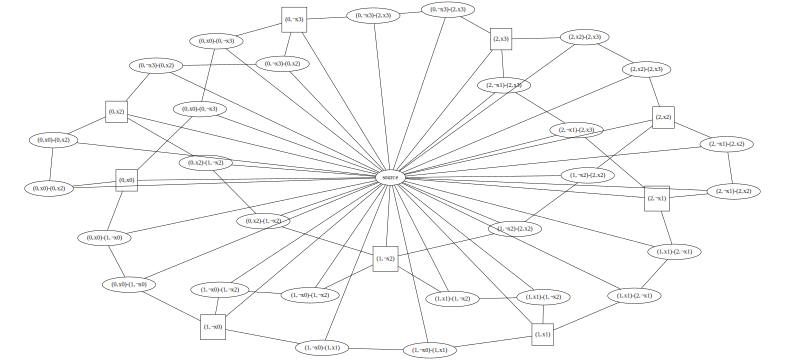

In [37]:
G = IS2MAXCUT(SAT2IS(φ))
G.graph_attr.update(size="11,5", ratio="fill")
G

In [38]:
# same reduction as above but handling colors and showing the resulting cut when the original graph has independent set
def IS2MAXCUT(G,I=[]):
    G =nxgraph(G)
    S = []
    H =Graph() # engine='sfdp')
    H.node("source",style='filled',fillcolor='blue')
    S.append("source")
    for v in G.nodes():
        color = ('red' if I and v in I else 'lightblue')
        H.node(v,label=subscript(v),fontsize="10",style='filled',fillcolor=color, shape="square")
        ecol = 'black'
        pwidth = '1'
        if I and v in I: 
            S.append(v)
            ecol = 'red'
            pwidth = '2'
        H.edge("source",v,color=ecol,penwidth=pwidth)  # len="2"
    
    j =0
    for (u,v) in G.edges():
        g1 = "e"+str(j)+"a"
        g2 = "e"+str(j)+"b"
        c1 = 'green'
        c2 = 'green'
        if I and (not u in I):
            c1 = 'red'
            S.append(g1)
        if I and (not v in I):
            c2 = 'red'
            S.append(g2)
        gadget = Graph("gadget"+str(j))
        gadget.node(g1,subscript("e0"),fontsize="10",style='filled',fillcolor=c1)
        gadget.node(g2,subscript("e1"),fontsize="10",style='filled',fillcolor=c2)
        gadget.edge(g1,g2,color=('red' if (g1 in S) != (g2 in I) else 'black'), penwidth=('2' if (g1 in S) != (g2 in I) else '1')) # len="1"
        gadget.edge(u,g1, color=('red' if (g1 in S) != (u in I) else 'black'),penwidth =('2' if (g1 in S) != (u in S) else '1')  ) # len="1"
        gadget.edge(v,g2, color=('red' if (g2 in S) != (v in I) else 'black'),penwidth= ('2' if (g2 in S) != (v in S) else '1') ) # len="1"
        
        H.subgraph(gadget)
        H.edge(g1,"source",color=('red' if (g1 in S)  else 'black'),penwidth=('2' if (g1 in S)  else '1')) # len="2.5"
        H.edge(g2,"source",color=('red' if (g2 in S)  else 'black'),penwidth= ('2' if (g2 in S)  else '1') )
        j +=1
        
    
    return (scale(H),S) if I else scale(H)

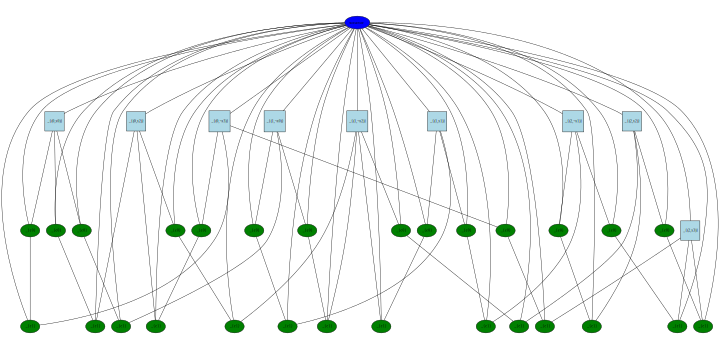

In [39]:
# IS2MAXCUT(*SAT2IS(φ,"1000"))[0]
IS2MAXCUT(SAT2IS(φ))

In [40]:
IS2MAXCUT(SAT2IS(Ψ))

In [41]:
IS2MAXCUT(*SAT2IS(Ψ,assign))[0]

__Claim:__ $G$ has $k$ iset $\Leftrightarrow$ $H$ has cut of $k+4m$ edges.

__Claim:__ $H$ has cut of $k+4m$ edges $\Rightarrow$ $G$ has set $I$ with $|I|-|E(I,I)| \geq k$.

## $k$  SAT 

__Problem:__ Prove that $4SAT \leq_p 3SAT$.

__Solution:__ $(a \vee b \vee c \vee d) \Leftrightarrow (a \vee b \vee s) \wedge (c \vee d \vee \neg s)$

__Problem:__ $1in3SAT$ is like 3SAT but satisfying assignment only allows _exactly one true literal_

Prove that $3SAT \leq_p 1in3SAT$

__Problem__ $SUBSETSUM$ input is $X_0,\ldots,X_{n-1},T$ and output is $1$ iff there exists $S$ such that $\sum_{i\in S} X_i = T$.
Prove $3SAT \leq_p SUBSETSUM$

Intermediate problem $SUBSETSUMVEC$, input is $X_0,\ldots,X_{n-1}$ vectors with $0,1$ coordinates and $T$ is vector, output is $1$ iff there exists $S$ such that $\sum_{i\in S} X_i = T$.

We prove $3SAT \leq_p SUBSETSUMVEC$ and $SUBSETSUMVEC \leq_p SUBSETSUM$

## Three coloring

In [44]:
def SAT23COL(φ,x=""):
    n = numvars(φ) 
    clauses = getclauses(φ)
    m = len(clauses)
    G =Graph() # (engine='neato')
    col = {}
    
    
    def nname(c,v): return f"({c},{v})"
    
    G.node("null", style="filled", fillcolor = "blue")
    G.node("true", style="filled", fillcolor = "green")
    G.node("false", style="filled", fillcolor = "red")
    G.edges(["null","true"],["null","false"],["true","false"])
    c = 0
    for i in range(n):
        if x:
            G.node("x"+str(i), style='filled', fillcolor = 'green' if x[i]=="1" else 'red')
            G.node("¬x"+str(i), style='filled', fillcolor = 'green' if x[i]=="0" else 'red')
        else:
            G.node("x"+str(i)), fillcolor = 'green' if x[i]=="0" else 'red')
            G.node("¬x"+str(i))
        G.edge("x"+str(i),"null")
        G.edge("¬x"+str(i),"null")
        
    for C in clauses:
        # work in progress
    return (scale(G) if not x else (scale(G),col))

SyntaxError: invalid syntax (<ipython-input-44-3fd6a3d5f38c>, line 21)

$x_1 + x_2 + x_3 + x_4 = 1$

$x_1 - x_2 + x_5       = 0$

$x_3 - x_5             = 0$

$\sum_{i\in S} A_i = T$

## Longest Path

In [45]:
def TSAT2LONGPATH(φ):
    """Reduce 3SAT to LONGPATH"""
    def var(v): # return variable and True/False depending if positive or negated
        return int(v[2:]),False if v[0]=="¬" else int(v[1:]),True
    n = numvars(φ)
    clauses = getclauses(φ)
    m = len(clauses)
    G =Graph() 
    G.edge("start","start_0")
    for i in range(n): # add 2 length-m paths per variable
        G.edge(f"start_{i}",f"v_{i}_{0}_T")
        G.edge(f"start_{i}",f"v_{i}_{0}_F")
        for j in range(m-1): 
            G.edge(f"v_{i}_{j}_T",f"v_{i}_{j+1}_T")
            G.edge(f"v_{i}_{j}_F",f"v_{i}_{j+1}_F")
        G.edge(f"v_{i}_{m-1}_T",f"end_{i}")
        G.edge(f"v_{i}_{m-1}_F",f"end_{i}")
        if i<n-1:
            G.edge(f"end_{i}",f"start_{i+1}")
    G.edge(f"end_{n-1}","start_clauses")
    for j,C in enumerate(clauses): # add gadget for each clause
        for v in enumerate(C):
            i,sign = var(v[1])
            s = "F" if sign else "T"
            G.edge(f"C_{j}_in",f"v_{i}_{j}_{s}")
            G.edge(f"v_{i}_{j}_{s}",f"C_{j}_out")
        if j<m-1:
            G.edge(f"C_{j}_out",f"C_{j+1}_in")
    G.edge("start_clauses","C_0_in")
    G.edge(f"C_{m-1}_out","end")
    return G


In [46]:


def TSAT2LONGPATH(φ):
    def var(v):
        if v[0]=="¬":
            return int(v[2:]),False
        else:
            return int(v[1:]),True
    n = numvars(φ)
    clauses = getclauses(φ)
    m = len(clauses)
    max_y = n+1
    def pos(x,y):
        size = 0.5
        scale = 2
        d = { "width": str(1.5*size), "height": str(size), "fontsize":"8", "pos":f"{scale*x},{scale*(max_y-y)}!"}
        return d
    
    G =Graph(engine='neato')
    G.node("start",**pos(0,0))
    G.node("start_0",**pos(0,0.5))
    G.edge("start","start_0")
    for i in range(n):
        if i<n-1:
            G.node(f"start_{i+1}",**pos(0,i+1+0.5) )
        G.node(f"end_{i}",**pos(m,i+0.5))
        G.node(f"v_{i}_{0}_T", **pos(0.5,i+0.2))
        G.node(f"v_{i}_{0}_F", **pos(0.5,i+0.7))
        G.edge(f"start_{i}",f"v_{i}_{0}_T")
        G.edge(f"start_{i}",f"v_{i}_{0}_F")
        for j in range(m-1):
            G.node(f"v_{i}_{j+1}_T", **pos(j+1.5,i+0.2))
            G.node(f"v_{i}_{j+1}_F", **pos(j+1.5,i+0.7))
            G.edge(f"v_{i}_{j}_T",f"v_{i}_{j+1}_T")
            G.edge(f"v_{i}_{j}_F",f"v_{i}_{j+1}_F")
        G.edge(f"v_{i}_{m-1}_T",f"end_{i}")
        G.edge(f"v_{i}_{m-1}_F",f"end_{i}")
        if i<n-1:
            G.edge(f"end_{i}",f"start_{i+1}")
    G.node("start_clauses",**pos(0,n))
    G.edge(f"end_{n-1}","start_clauses")
    for j,C in enumerate(clauses):
        for v in enumerate(C):
            i,sign = var(v[1])
            s = "F" if sign else "T"
            G.node(f"C_{j}_in", **pos(j+0.7,n))
            G.node(f"C_{j}_out", **pos(j+1.2,n))
            G.edge(f"C_{j}_in",f"v_{i}_{j}_{s}")
            G.edge(f"v_{i}_{j}_{s}",f"C_{j}_out")
        if j<m-1:
            G.edge(f"C_{j}_out",f"C_{j+1}_in")
    G.edge("start_clauses","C_0_in")
    G.node("end",**pos(m+1,n))
    G.edge(f"C_{m-1}_out","end")
    return G


In [47]:
φ

'(x0 ∨ ¬x3 ∨ x2) ∧ (¬x0 ∨ x1 ∨ ¬x2) ∧ (¬x1 ∨ x2 ∨ x3)'

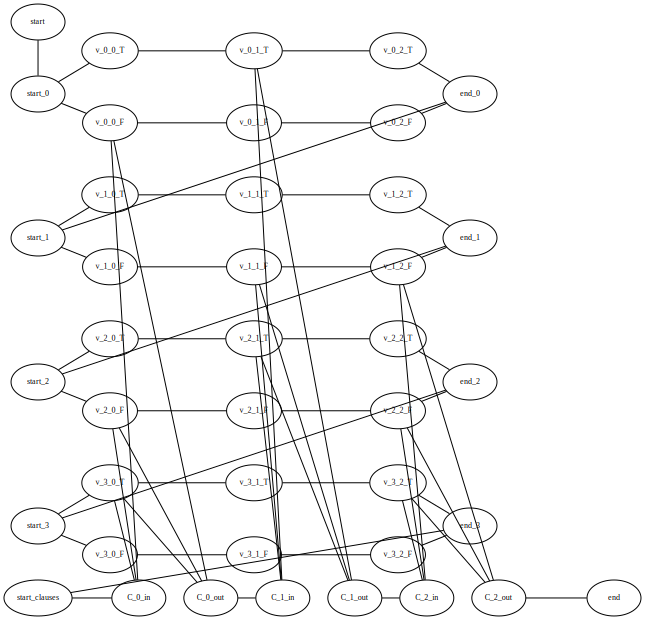

In [48]:
TSAT2LONGPATH("(x0 ∨ ¬x3 ∨ x2 ) ∧ (¬x0 ∨ x1 ∨ ¬x2 ) ∧ (x1 ∨ x2 ∨ ¬x3 )")